#Tarea 1 - Parte 2
##Diego Alberto Martinez Simbaqueva

3. Escriba una clase con las siguientes funcionalidades:

3.1. Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv. Instancie los datos en un dataframe de Pandas.

3.2. Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables (sepal.length, sepal.width, petal.length, etc)

3.3. Implemente un método que entregue los nombre de las variables disponibles.

3.4. Implemente un método que reciba el nombre de una variable disponible dentro del objeto (en el dataframe) y regrese: sus estadísticas básicas: media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable.

#Solución

Llamamos las librerías necesarias e importamos los datos para esta tarea:

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

import io
df2 = pd.read_csv(io.BytesIO(uploaded['iris_csv.csv']))

Saving iris_csv.csv to iris_csv.csv


Ahora creamos la clase solicitada:

In [ ]:
class ResumenDescriptivo:
    def __init__(self, df):
        self.datos = pd.read_csv(df)

    def estadisticas(self):
        variables_numericas = self.datos.select_dtypes(include=['number']).describe()
        variables_categoricas = self.datos.select_dtypes(include=['object']).describe()
        return variables_numericas, variables_categoricas

    def disponibles(self):
        return self.datos.columns.tolist()

    def estad_variable(self, nombre_variable):
        if nombre_variable in self.datos.columns:
            variable = self.datos[nombre_variable]
            if pd.api.types.is_numeric_dtype(variable):
                mean = variable.mean()
                median = variable.median()
                std = variable.std()
                q25 = variable.quantile(0.25)
                q50 = variable.quantile(0.5)
                q75 = variable.quantile(0.75)

                plt.hist(variable, bins=15,edgecolor='black',color="blue")
                plt.title(f'Histograma para la variable {nombre_variable}')
                plt.xlabel(nombre_variable)
                plt.ylabel('Frecuencia')
                plt.show()

                return {
                    "mean": mean,
                    "median": median,
                    "std": std,
                    "q25": q25,
                    "q50": q50,
                    "q75": q75 }
            else:
                return "La variable seleccionada no es numérica."


        else:
            return "La variable no está en la base de datos. Pruebe la función 'disponibles' para conocer las variables con las que puede realizar el análisis."

Finalmente, probamos la clase con los datos de Iris

In [ ]:
Prueba = ResumenDescriptivo("iris_csv.csv")
print(Prueba.estadisticas())

(       sepallength  sepalwidth  petallength  petalwidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000,               class
count           150
unique            3
top     Iris-setosa
freq             50)


In [ ]:
print(Prueba.disponibles())

['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']


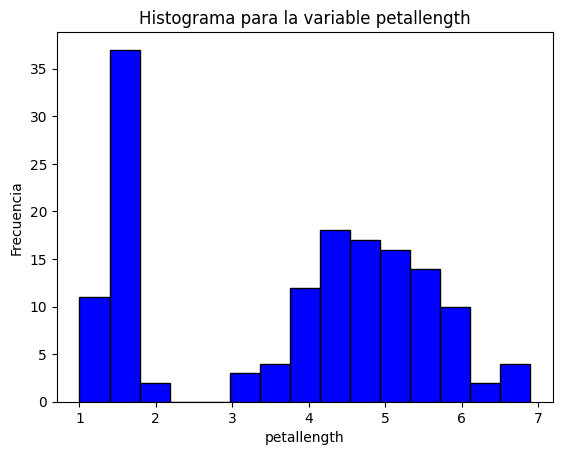

{'mean': 3.758666666666666, 'median': 4.35, 'std': 1.7644204199522626, 'q25': 1.6, 'q50': 4.35, 'q75': 5.1}


In [ ]:
print(Prueba.estad_variable("petallength"))

In [ ]:
print(Prueba.estad_variable("petallllength"))

La variable no está en la base de datos. Pruebe la función 'disponibles' para conocer las variables con las que puede realizar el análisis.


In [ ]:
print(Prueba.estad_variable("class"))

La variable seleccionada no es numérica
